# Capstone Project - Cyclades Islands cluster, got clustered 
### Applied Data Science Capstone by IBM/Coursera

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project, our stakeholder is a major tourist agency that aims to fulfill its customer's needs. To achieve that, they need to match the customer's preferences with appropriate tourist destinations and attractions. 

Our job is to do achieve that for the Greek islands cluster of Cyclades. Main attractions of Cyclades are their beaches. Whether a tourist wants to socialize, have a drink at a loud beach bar, relax by the calm waves, come closer with nature or seeks adrenaline of water sports there is the right beach for her. We will analyze the most popular of them from every island and hopefully, with the power of machine learning algorithms, we will be able to group them in a way that helps our stakeholder put together tourist packages that will direct customers close to a beach that will satisfy them the most.     

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* number of top nearby venues for each beach, to determine the most popular and thus meaningful for our analysis.
* popular venue categories near each beach, to help us make groups of similar beaches 
* venue categories that beach visitors go right after the beach, to help us better identify each group.

Cyclades consists of 33 islands varying in size and character. We decided to include only the top 12 according to the number of incoming ferry passengers during 2018.  

Following data sources will be needed to extract/generate the required information:
* top 18 islands, according to the number of incoming ferry passengers during 2018 using online available data from **ELSTAT** (Greek statistical authority)
* coordinates of each island using **Geopy** Python geocoding client
* coordinates of the top beaches of each island, in terms of numbers of nearby venues using **Foursquare API**
* most popular venue categories for each beach using **Foursquare API** 
* venue categories that users go after every particular beach using **Foursquare API**


### Island Selection

As mentioned above, Cyclades consists of 33 Islands. In consultation with our stakeholders, we decided to take in consideration only the top 12 most visited, as they have a meaningful market size, to analyze. In order to determine that, we draw online data from ELSTAT. Specifically we want to look at incoming ferry passengers during 2018 for every island and then choose the top 12.

In [1]:
pip install dill

  Stored in directory: C:\Users\lycor\AppData\Local\pip\Cache\wheels\c9\de\a4\a91eec4eea652104d8c81b633f32ead5eb57d1b294eab24167
Successfully built dill
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np # library to handle data in a vectorized manner
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df_cyclades=pd.read_excel('http://www.insete.gr/Portals/0/statistics/Perifereies/EN/South_Aegean_Region_ENG.xlsx', sheet_name='Passenger Traffic in Ports', header=3)
df_cyclades.head()

,YEAR,Regional Area,Port,PASSENGERS WITH P/S - C/S,PASSENGERS WITH P/S - C/S .1,PASSENGERS WITH P/S - C/S .2,Unnamed: 6,Unnamed: 7
0,2018,Cyclades,Aegiali Amorgos,30816.0,27393.0,58209.0,NaN,NaN
1,NaN,NaN,Katapola Amorgos,59954.0,67185.0,127139.0,NaN,NaN
2,NaN,NaN,Anafi,13936.0,14199.0,28135.0,NaN,NaN
3,NaN,NaN,Antiparos,326429.0,326357.0,652786.0,NaN,NaN
4,NaN,NaN,Gavrio Andros,275900.0,275554.0,551454.0,NaN,NaN


In [4]:
# let's drop unnecessary columns
df_cyclades.drop(['YEAR', 'Regional Area', 'PASSENGERS WITH P/S - C/S .1', 'PASSENGERS WITH P/S - C/S .2', 'Unnamed: 6', 'Unnamed: 7'], axis=1, inplace=True)
#let's keep only the rows with islands that belong to Cyclades cluster
df_cyclades=df_cyclades.iloc[0:25]

In [5]:
# let's give our second column a more descriptive name
df_cyclades.rename(columns={
                          "PASSENGERS WITH P/S - C/S " : "Incoming_Passengers"
                          }, 
                 inplace=True)
print(df_cyclades)

                Port  Incoming_Passengers
0    Aegiali Amorgos              30816.0
1   Katapola Amorgos              59954.0
2              Anafi              13936.0
3          Antiparos             326429.0
4      Gavrio Andros             275900.0
5           Donoussa              19960.0
6            Iraklia              13142.0
7              Thira            1027773.0
8           Thirasia              15159.0
9                Ios             155365.0
10               Kea             144254.0
11           Kimolos              45497.0
12        Koufonissi              64115.0
13           Kythnos              88661.0
14      Adamas Milos             187132.0
15           Mykonos             790150.0
16             Naxos             518884.0
17             Paros             924105.0
18           Serifos              76360.0
19           Sikinos              12179.0
20            Sifnos             133064.0
21        Schinoussa              18388.0
22             Syros             3

In [6]:
df_cyclades

,Port,Incoming_Passengers
0,Aegiali Amorgos,30816.0
1,Katapola Amorgos,59954.0
2,Anafi,13936.0
3,Antiparos,326429.0
4,Gavrio Andros,275900.0
5,Donoussa,19960.0
6,Iraklia,13142.0
7,Thira,1027773.0
8,Thirasia,15159.0
9,Ios,155365.0


In [7]:
# let's sort our dataframe by Incoming Passengers and reset the index
df_cyclades.sort_values(by=["Incoming_Passengers"], axis=0, inplace=True, ascending=False)
df_cyclades.reset_index(drop=True, inplace=True)
df_cyclades

,Port,Incoming_Passengers
0,Thira,1027773.0
1,Paros,924105.0
2,Mykonos,790150.0
3,Naxos,518884.0
4,Tinos,500300.0
5,Syros,350416.0
6,Antiparos,326429.0
7,Gavrio Andros,275900.0
8,Adamas Milos,187132.0
9,Ios,155365.0


In [8]:
# let's keep only the top 12
df_cyclades=df_cyclades.head(12)
df_cyclades

,Port,Incoming_Passengers
0,Thira,1027773.0
1,Paros,924105.0
2,Mykonos,790150.0
3,Naxos,518884.0
4,Tinos,500300.0
5,Syros,350416.0
6,Antiparos,326429.0
7,Gavrio Andros,275900.0
8,Adamas Milos,187132.0
9,Ios,155365.0


### Islands Coordinates 

We will use geopy geocoder client to determine the islands coordinates

In [9]:
!pip install geopy

In [10]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Vakkas")
lat=[]
lon=[]

In [11]:
# get coordinates for every island
for i, port in zip(df_cyclades.index, df_cyclades['Port']):
    location = geolocator.geocode("{} , Greece".format(df_cyclades['Port'].loc[i]))
    lat.append(location.latitude)
    lon.append(location.longitude)
    #print(location.address)
    #print((location.latitude, location.longitude))
    #print(location.raw)
# add the coordinates to the original dataframe
df_cyclades['Latitude']=lat
df_cyclades['Longitude']=lon
df_cyclades.head()    

C:\Users\lycor\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\lycor\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


,Port,Incoming_Passengers,Latitude,Longitude
0,Thira,1027773.0,36.407111,25.456664
1,Paros,924105.0,37.065105,25.192167
2,Mykonos,790150.0,37.451423,25.392310
3,Naxos,518884.0,37.060010,25.470757
4,Tinos,500300.0,37.601403,25.154144


### Beaches Coordinates using Foursquare

Now that we have determined the islands and their coordinates we can utilize Foursquare API to find beaches for each island and their coordinates.

In [12]:
# The code was removed by Watson Studio for sharing.

In [13]:
import requests
import json # library to handle JSON files

In [14]:
# let's make a function that queries Foursquare API for beaches around the islands coordinates and adds the beach coordinates to a dataframe
def getTopBeaches(names, latitudes, longitudes):
    ID='4bf58dd8d48988d1e2941735' #category ID for beach
    LIMIT=10
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&categoryId={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            lat, 
            lng,
            VERSION,
            ID, 
            LIMIT)
            
        # make the GET request
        #result0 = requests.get(url).json()
        #result1 = result0['response']['groups'][0]['items']
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng']) for v in results])
    
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
            
    nearby_venues.columns = ['Island', 
                  'Island Latitude', 
                  'Island Longitude', 
                  'Beach', 
                  'Beach Latitude', 
                  'Beach Longitude']
    
    return(nearby_venues)

In [15]:
Top_Cyclades_Beaches=getTopBeaches(names=df_cyclades['Port'],
                                   latitudes=df_cyclades['Latitude'],
                                   longitudes=df_cyclades['Longitude'])

Thira
Paros
Mykonos
Naxos
Tinos
Syros
Antiparos
Gavrio Andros
Adamas Milos
Ios
Kea
Sifnos


In [16]:
Top_Cyclades_Beaches[Top_Cyclades_Beaches['Beach'].duplicated(keep=False)] # we check if foursquare returned any duplicate values

,Island,Island Latitude,Island Longitude,Beach,Beach Latitude,Beach Longitude
15,Paros,37.065105,25.192167,Farangas beach,36.986517,25.155325
37,Naxos,37.060010,25.470757,Agios Georgios Beach (Παραλία Αγίου Γεωργίου),37.098911,25.375219
65,Antiparos,36.994353,25.048208,Agios Georgios Beach (Παραλία Αγίου Γεωργίου),36.974890,25.024838
68,Antiparos,36.994353,25.048208,Farangas beach,36.986517,25.155325


In [17]:
# we rename beaches that have the same name but are in different islands and remove duplicates that are wrongly assigned to more than one island
Top_Cyclades_Beaches['Beach'].iloc[37] = Top_Cyclades_Beaches['Beach'].iloc[37] + ", " + Top_Cyclades_Beaches['Island'].iloc[37]
Top_Cyclades_Beaches['Beach'].iloc[65] = Top_Cyclades_Beaches['Beach'].iloc[65] + ", " + Top_Cyclades_Beaches['Island'].iloc[65]
indx = [68]
Top_Cyclades_Beaches.drop(index = indx, inplace=True)

C:\Users\lycor\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [18]:
Top_Cyclades_Beaches.reset_index(inplace=True, drop=True)

In [19]:
print(Top_Cyclades_Beaches.shape, Top_Cyclades_Beaches.head())

print("We found {} beaches. Let's visualize them to better understand our data".format(Top_Cyclades_Beaches.shape[0]))

(119, 6)   Island  Island Latitude  Island Longitude  \
0  Thira        36.407111         25.456664   
1  Thira        36.407111         25.456664   
2  Thira        36.407111         25.456664   
3  Thira        36.407111         25.456664   
4  Thira        36.407111         25.456664   

                                  Beach  Beach Latitude  Beach Longitude  
0       Kamari Beach (Παραλία Καμαρίου)       36.376584        25.485964  
1  Monolithos Beach (Παραλία Μονόλιθου)       36.404254        25.482393  
2      Perissa Beach (Παραλία Περίσσας)       36.355556        25.475620  
3           Perivolos Beach (Περίβολος)       36.342231        25.459853  
4     Vlichada Beach (Παραλία Βλυχάδας)       36.338505        25.432236  
We found 119 beaches. Let's visualize them to better understand our data


In [20]:
!pip install folium 
import folium # map rendering library

In [21]:
# let's create map of Cyclades using latitude and longitude values
map_cyclades = folium.Map(location=[37.065105, 25.192167], zoom_start=8)

# adding markers to map
for lat, lng, beach, island in zip(Top_Cyclades_Beaches['Beach Latitude'], Top_Cyclades_Beaches['Beach Longitude'], Top_Cyclades_Beaches['Beach'], Top_Cyclades_Beaches['Island']):
    label = '{}, {}'.format(island, beach)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cyclades)  
    
map_cyclades

By exploring the map we notice that, in some cases, Foursquare returned many duplicate results for the same beach. Also many beaches are too close together and can be considered as one for our analysis. 

Let's calculate the distances between every result and drop the unnecessary.

In [22]:
from geopy import distance

In [23]:
beach_list1 = []
beach_list2 = []
dist = []
for name1, lat1, lon1 in zip(Top_Cyclades_Beaches['Beach'], Top_Cyclades_Beaches['Beach Latitude'], Top_Cyclades_Beaches['Beach Longitude']):
    for name2, lat2, lon2 in zip(Top_Cyclades_Beaches['Beach'], Top_Cyclades_Beaches['Beach Latitude'], Top_Cyclades_Beaches['Beach Longitude']):
        if lat1 != lat2:
            coords_1 = (lat1, lon1)
            coords_2 = (lat2, lon2)
            if distance.distance(coords_1, coords_2).km < 1: # we track every pair of points that are less than one km apart 
                beach_list1.append(name1)
                beach_list2.append(name2)
                w = distance.distance(coords_1, coords_2).km
                dist.append(w)

In [24]:
#let's put the results in a DataFrame
near_beaches=pd.DataFrame()
near_beaches['beach_list1'] = beach_list1
near_beaches['beach_list2'] = beach_list2
near_beaches['dist'] = dist
# we drop the duplicate comparisons
near_beaches.drop_duplicates(subset=['dist'], inplace=True)
near_beaches.reset_index(drop=True, inplace=True)
near_beaches

,beach_list1,beach_list2,dist
0,Kamari Beach (Παραλία Καμαρίου),Kamara Beach,0.818548
1,Paroikia Beach (Παραλία Παροικιάς),Livadia Beach (Παραλία Λιβάδια),0.575176
2,Panormos Beach (Πάνορμος),Principote Panormos Mykonos,0.007382
3,Panormos Beach (Πάνορμος),Agios Sostis Beach (Άγιος Σώστης),0.857164
4,Principote Panormos Mykonos,Agios Sostis Beach (Άγιος Σώστης),0.851248
5,Agios Prokopios Beach (Παραλία Αγίου Προκοπίου),Agia Anna Beach (Παραλία Αγίας Άννας),0.775860
6,Kolympithra Beach (Κολυμπήθρα),Tinos Surf Lessons,0.268456
7,Agios Romanos,Παραλία Αγίου Ρωμανού,0.070406
8,Agios Romanos,Απηγανιά,0.610088
9,Kalyvia Beach,Παραλία Καλύβια,0.002099


In [25]:
#we remove unnecessary results from our original DataFrame
drindexes = []
for beach in near_beaches['beach_list2']:
    for j, beach2 in enumerate(Top_Cyclades_Beaches['Beach']):
        if beach == beach2:
            drindexes.append(j) 

Top_Cyclades_Beaches.drop(drindexes, inplace=True)
Top_Cyclades_Beaches.reset_index(drop=True, inplace=True)

print("After removing duplicates, we now have {} beaches. Let's visualize our new data.".format(Top_Cyclades_Beaches.shape[0]))

After removing duplicates, we now have 86 beaches. Let's visualize our new data.


In [26]:
# create map of Cyclades using latitude and longitude values
map_cyclades = folium.Map(location=[37.065105, 25.192167], zoom_start=8)

# add markers to map
for lat, lng, beach, island in zip(Top_Cyclades_Beaches['Beach Latitude'], Top_Cyclades_Beaches['Beach Longitude'], Top_Cyclades_Beaches['Beach'], Top_Cyclades_Beaches['Island']):
    label = '{}, {}'.format(island, beach)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cyclades)  
    
map_cyclades

### Top Nearby Venues using Foursquare 

Now that we have selected the beaches, we can query Foursquare API and get the top nearby venues for every beach.

In [27]:
# let's create a function that gets nearby venues for our beaches
def getNearbyVenues(names, latitudes, longitudes, radius=2000):
    LIMIT=50
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Beach', 
                  'Beach Latitude', 
                  'Beach Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [28]:
Cyclades_Beaches_Venues=getNearbyVenues(names=Top_Cyclades_Beaches['Beach'],
                                   latitudes=Top_Cyclades_Beaches['Beach Latitude'],
                                   longitudes=Top_Cyclades_Beaches['Beach Longitude'])

Kamari Beach (Παραλία Καμαρίου)
Monolithos Beach (Παραλία Μονόλιθου)
Perissa Beach (Παραλία Περίσσας)
Perivolos Beach (Περίβολος)
Vlichada Beach (Παραλία Βλυχάδας)
Eros (Έρως)
Yalos Santorini
White Beach (Άσπρη Παραλία)
Locura Beach
Parasporos Beach (Παραλία Παρασπόρου)
Martselo Beach (Μαρτσέλο)
Golden Beach (Χρυσή Ακτή)
Kolympithres (Κολυμπήθρες)
Paroikia Beach (Παραλία Παροικιάς)
Farangas beach
Lolantonis Beach
Laggeri Beach (Λάγγερη)
Monastiri Beach (Μοναστήρι)
Kalo Livadi Beach (Καλό Λιβάδι)
Ftelia Beach (Φτελιά)
Elia Beach (Ελιά)
Kalafati Beach (Καλαφάτης)
Panormos Beach (Πάνορμος)
Fokos Beach (Φωκός)
Super Paradise
Lia Beach (Λιά)
Plaka Beach (Παραλία Πλάκας)
Mikri Vigla Beach (Παραλία Μικρής Βίγλας)
Agios Prokopios Beach (Παραλία Αγίου Προκοπίου)
Kastraki Beach (Παραλία Καστρακίου)
Psili Ammos (Ψιλή Άμμος)
Hawaii Beach
Agios Georgios Beach (Παραλία Αγίου Γεωργίου), Naxos
Agiassos Beach (Παραλία Αγιασσός)
Orkos Beach
Kolympithra Beach (Κολυμπήθρα)
Agios Romanos
Kalyvia Beach
Κιόν

Let's check how many results we got and what they look like. 

In [29]:
print(Cyclades_Beaches_Venues.head(), Cyclades_Beaches_Venues.shape)
print("We got back {} results but beaches themselves are also included in the list. Let's remove them.".format(Cyclades_Beaches_Venues.shape[0]))

                             Beach  Beach Latitude  Beach Longitude  \
0  Kamari Beach (Παραλία Καμαρίου)       36.376584        25.485964   
1  Kamari Beach (Παραλία Καμαρίου)       36.376584        25.485964   
2  Kamari Beach (Παραλία Καμαρίου)       36.376584        25.485964   
3  Kamari Beach (Παραλία Καμαρίου)       36.376584        25.485964   
4  Kamari Beach (Παραλία Καμαρίου)       36.376584        25.485964   

                             Venue  Venue Latitude  Venue Longitude  \
0                Pinakio (Πινάκιο)       36.377333        25.483094   
1  Kamari Beach (Παραλία Καμαρίου)       36.376584        25.485964   
2                      Sabbia Nera       36.380002        25.486956   
3                         Il Forno       36.377082        25.483737   
4                 Bellonias Villas       36.373354        25.483360   

      Venue Category  
0    Meze Restaurant  
1              Beach  
2  Trattoria/Osteria  
3        Pizza Place  
4              Hotel   (1934, 7

In [30]:
index_names=Cyclades_Beaches_Venues[Cyclades_Beaches_Venues['Venue Category']=='Beach'].index
Cyclades_Beaches_Venues.drop(index_names, inplace=True)

In [31]:
Cyclades_Beaches_Venues.reset_index(drop=True, inplace=True)

In [32]:
print(Cyclades_Beaches_Venues.shape)
print("We now have {} results.".format(Cyclades_Beaches_Venues.shape[0]))

(1683, 7)
We now have 1683 results.


We can check how many results we got for each beach.

In [33]:
Cyclades_Beaches_Venues.groupby('Beach').count()

,Beach Latitude,Beach Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Beach,,,,,,
Achivadolimni (Αχιβαδόλιμνη),3,3,3,3,3,3
Agia Kyriaki (Αγία Κυριακή),9,9,9,9,9,9
Agia Theodoti Beach (Παραλία Αγίας Θεοδότης),3,3,3,3,3,3
Agiassos Beach (Παραλία Αγιασσός),6,6,6,6,6,6
Agios Fokas Beach (Άγιος Φωκάς),49,49,49,49,49,49
"Agios Georgios Beach (Παραλία Αγίου Γεωργίου), Naxos",49,49,49,49,49,49
Agios Petros Beach (Παραλία Αγίου Πέτρου),46,46,46,46,46,46
Agios Prokopios Beach (Παραλία Αγίου Προκοπίου),46,46,46,46,46,46
Agios Romanos,2,2,2,2,2,2


We see that there are many beaches that returned only a few venues. These places, are either too isolate or with little to none tourist infrastructures and thus do not help our stakeholders include them in their tourist packages. We should remove them.

In [34]:
df_temp=Cyclades_Beaches_Venues.groupby('Beach').count()
df_index_temp=df_temp[df_temp['Venue']<12].index # we target beaches with less than 12 venues
df_index_temp2=[]
df_index_temp22=[]
s=0
for i in df_index_temp:
#df_index_temp2=Cyclades_Beaches_Venues[Cyclades_Beaches_Venues['Beach']==i].index
    df_index_temp2.append(Cyclades_Beaches_Venues[Cyclades_Beaches_Venues['Beach']==i].index)
    df_index_temp22.append(Top_Cyclades_Beaches[Top_Cyclades_Beaches['Beach']==i].index)
df_index_temp2 = [item for sublist in df_index_temp2 for item in sublist]
df_index_temp22 = [item for sublist in df_index_temp22 for item in sublist]
Cyclades_Beaches_Venues.drop(df_index_temp2, inplace=True)
Top_Cyclades_Beaches.drop(df_index_temp22, inplace=True)
print(Cyclades_Beaches_Venues.shape)
print("We are finaly left with {} venues.".format(Cyclades_Beaches_Venues.shape[0]))

(1487, 7)
We are finaly left with 1487 venues.


In [35]:
Cyclades_Beaches_Venues.reset_index(drop=True, inplace=True)
Top_Cyclades_Beaches.reset_index(drop=True, inplace=True)
Cyclades_Beaches_Venues.head()

,Beach,Beach Latitude,Beach Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kamari Beach (Παραλία Καμαρίου),36.376584,25.485964,Pinakio (Πινάκιο),36.377333,25.483094,Meze Restaurant
1,Kamari Beach (Παραλία Καμαρίου),36.376584,25.485964,Sabbia Nera,36.380002,25.486956,Trattoria/Osteria
2,Kamari Beach (Παραλία Καμαρίου),36.376584,25.485964,Il Forno,36.377082,25.483737,Pizza Place
3,Kamari Beach (Παραλία Καμαρίου),36.376584,25.485964,Bellonias Villas,36.373354,25.483360,Hotel
4,Kamari Beach (Παραλία Καμαρίου),36.376584,25.485964,Prince restaurant-lounge bar,36.375268,25.484685,Restaurant


In [36]:
print("Also, our final number of beaches is {}.".format(Cyclades_Beaches_Venues['Beach'].unique().shape[0]))

Also, our final number of beaches is 47.


In [37]:
print("Also, our final number of beaches is {}.".format(Top_Cyclades_Beaches['Beach'].shape[0]))

Also, our final number of beaches is 47.


### Top Venues visited after every beach, using Foursquare.

We will ask Foursquare for venues that users go after each beach. Later on, this information will contribute to the task of identification of clusters.

In [38]:
def getNextVenues(names, latitudes, longitudes, radius=2000):
    LIMIT=5
    sect='nextVenues'
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT,
            sect)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Beach', 
                  'Beach Latitude', 
                  'Beach Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [39]:
Cyclades_Beaches_Next=getNextVenues(names=Top_Cyclades_Beaches['Beach'],
                                   latitudes=Top_Cyclades_Beaches['Beach Latitude'],
                                   longitudes=Top_Cyclades_Beaches['Beach Longitude'])

Kamari Beach (Παραλία Καμαρίου)
Monolithos Beach (Παραλία Μονόλιθου)
Perissa Beach (Παραλία Περίσσας)
Perivolos Beach (Περίβολος)
Vlichada Beach (Παραλία Βλυχάδας)
Eros (Έρως)
White Beach (Άσπρη Παραλία)
Locura Beach
Parasporos Beach (Παραλία Παρασπόρου)
Martselo Beach (Μαρτσέλο)
Golden Beach (Χρυσή Ακτή)
Kolympithres (Κολυμπήθρες)
Paroikia Beach (Παραλία Παροικιάς)
Farangas beach
Lolantonis Beach
Laggeri Beach (Λάγγερη)
Kalo Livadi Beach (Καλό Λιβάδι)
Ftelia Beach (Φτελιά)
Elia Beach (Ελιά)
Kalafati Beach (Καλαφάτης)
Panormos Beach (Πάνορμος)
Super Paradise
Lia Beach (Λιά)
Plaka Beach (Παραλία Πλάκας)
Agios Prokopios Beach (Παραλία Αγίου Προκοπίου)
Agios Georgios Beach (Παραλία Αγίου Γεωργίου), Naxos
Orkos Beach
Κιόνια
Agios Fokas Beach (Άγιος Φωκάς)
Pachia Ammos (Παχιά Άμμος)
Galissas Beach (Παραλία Γαλησσά)
Agkathopes Beach (Αγκαθωπές)
Asteria (Αστέρια)
Kokkina Beach
Agios Petros Beach (Παραλία Αγίου Πέτρου)
Aneroussa Beach (Παραλία Ανερούσας)
Batsi Beach (Παραλία Μπατσίου)
Sarakini

Like before, we remove venue category 'Beach' from our results, plus the beaches that don't have significance for our research.

In [40]:
index_names=Cyclades_Beaches_Next[Cyclades_Beaches_Next['Venue Category']=='Beach'].index
Cyclades_Beaches_Next.drop(index_names, inplace=True)
Cyclades_Beaches_Next.reset_index(drop=True, inplace=True)

In [41]:
df_index_temp3=[]
for i in df_index_temp:
#df_index_temp2=Cyclades_Beaches_Venues[Cyclades_Beaches_Venues['Beach']==i].index
    df_index_temp3.append(Cyclades_Beaches_Next[Cyclades_Beaches_Next['Beach']==i].index)
df_index_temp3 = [item for sublist in df_index_temp3 for item in sublist]
Cyclades_Beaches_Next.drop(df_index_temp3, inplace=True)
Cyclades_Beaches_Next.reset_index(drop=True, inplace=True)

In [42]:
print(Cyclades_Beaches_Next.head(), Cyclades_Beaches_Next.shape)
print("We finaly have {} results. We can also check how many result we got for every beach.".format(Cyclades_Beaches_Next.shape[0]))

                                  Beach  Beach Latitude  Beach Longitude  \
0       Kamari Beach (Παραλία Καμαρίου)       36.376584        25.485964   
1       Kamari Beach (Παραλία Καμαρίου)       36.376584        25.485964   
2       Kamari Beach (Παραλία Καμαρίου)       36.376584        25.485964   
3       Kamari Beach (Παραλία Καμαρίου)       36.376584        25.485964   
4  Monolithos Beach (Παραλία Μονόλιθου)       36.404254        25.482393   

                          Venue  Venue Latitude  Venue Longitude  \
0             Pinakio (Πινάκιο)       36.377333        25.483094   
1                   Sabbia Nera       36.380002        25.486956   
2                      Il Forno       36.377082        25.483737   
3  Prince restaurant-lounge bar       36.375268        25.484685   
4                 Mario (Μαριώ)       36.403998        25.487582   

      Venue Category  
0    Meze Restaurant  
1  Trattoria/Osteria  
2        Pizza Place  
3         Restaurant  
4   Greek Restauran

In [43]:
Cyclades_Beaches_Next.groupby('Beach').count()

,Beach Latitude,Beach Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Beach,,,,,,
Agios Fokas Beach (Άγιος Φωκάς),4,4,4,4,4,4
"Agios Georgios Beach (Παραλία Αγίου Γεωργίου), Naxos",5,5,5,5,5,5
Agios Petros Beach (Παραλία Αγίου Πέτρου),3,3,3,3,3,3
Agios Prokopios Beach (Παραλία Αγίου Προκοπίου),4,4,4,4,4,4
Agkathopes Beach (Αγκαθωπές),4,4,4,4,4,4
Aneroussa Beach (Παραλία Ανερούσας),4,4,4,4,4,4
Asteria (Αστέρια),4,4,4,4,4,4
Batsi Beach (Παραλία Μπατσίου),5,5,5,5,5,5
Elia Beach (Ελιά),1,1,1,1,1,1


## Methodology <a name="methodology"></a>

In order to give our stakeholders insights about Cyclades' beaches, we will focus in categorizing those using **k-means** clustering algorithm. Venue categories will be used as input to the algorithm. In particular, most popular venue categories for each beach will be used to group beaches to clusters. Then we will try to identify-name the clusters with the help of the venue categories that tourists visit after each beach and draw our final conclusions. 

## Analysis <a name="analysis"></a>

Now that we have gathered all the data we need, we can start exploring them for useful information. Initially, we will use onehot encoding to venues categories.  

In [44]:
# one hot encoding
Cyclades_onehot = pd.get_dummies(Cyclades_Beaches_Venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Cyclades_onehot['Beach'] = Cyclades_Beaches_Venues['Beach'] 

# move neighborhood column to the first column
fixed_columns = [Cyclades_onehot.columns[-1]] + list(Cyclades_onehot.columns[:-1])
Cyclades_onehot = Cyclades_onehot[fixed_columns]

Cyclades_onehot.head()

,Beach,Airport,Airport Lounge,Airport Service,Athletics & Sports,BBQ Joint,Baggage Locker,Bakery,Bar,Bay,Beach Bar,Bed & Breakfast,Bike Rental / Bike Share,Bistro,Boat or Ferry,Boutique,Breakfast Spot,Brewery,Buffet,Burger Joint,Cafeteria,Café,Campground,Candy Store,Cheese Shop,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Creperie,Cultural Center,Deli / Bodega,Department Store,Dessert Shop,Dive Shop,Dive Spot,Electronics Store,Fast Food Restaurant,Fish Taverna,Flea Market,Food,Food & Drink Shop,Food Court,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gastropub,Go Kart Track,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Historic Site,History Museum,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kafenio,Lake,Lighthouse,Lounge,Magirio,Market,Mediterranean Restaurant,Mexican Restaurant,Meze Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern Greek Restaurant,Mountain,Movie Theater,Museum,Neighborhood,Nightclub,Office,Other Great Outdoors,Outdoors & Recreation,Ouzeri,Pet Store,Pharmacy,Pier,Pizza Place,Plaza,Pool,Port,Pub,Rental Car Location,Resort,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Snack Place,Soup Place,Souvlaki Shop,Stadium,Steakhouse,Summer Camp,Supermarket,Surf Spot,Sushi Restaurant,Taverna,Tennis Court,Thai Restaurant,Theater,Trail,Trattoria/Osteria,Tsipouro Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Water Park,Wine Bar
0,Kamari Beach (Παραλία Καμαρίου),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Kamari Beach (Παραλία Καμαρίου),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,Kamari Beach (Παραλία Καμαρίου),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Kamari Beach (Παραλία Καμαρίου),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Kamari Beach (Παραλία Καμαρίου),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [45]:
Cyclades_onehot.shape

(1487, 127)

We have created a table with all the venues categories as columns and our data are either 1 for each existing venue category in a particular beach or 0. Let's group our table by 'Beach' and get the mean of each column to see the frequency that each venue category occurs in every beach.

In [46]:
Cyclades_grouped = Cyclades_onehot.groupby('Beach').mean().reset_index()
Cyclades_grouped

,Beach,Airport,Airport Lounge,Airport Service,Athletics & Sports,BBQ Joint,Baggage Locker,Bakery,Bar,Bay,Beach Bar,Bed & Breakfast,Bike Rental / Bike Share,Bistro,Boat or Ferry,Boutique,Breakfast Spot,Brewery,Buffet,Burger Joint,Cafeteria,Café,Campground,Candy Store,Cheese Shop,Chinese Restaurant,Church,Clothing Store,Cocktail Bar,Coffee Shop,Comfort Food Restaurant,Convenience Store,Creperie,Cultural Center,Deli / Bodega,Department Store,Dessert Shop,Dive Shop,Dive Spot,Electronics Store,Fast Food Restaurant,Fish Taverna,Flea Market,Food,Food & Drink Shop,Food Court,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gastropub,Go Kart Track,Greek Restaurant,Grilled Meat Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gymnastics Gym,Harbor / Marina,Historic Site,History Museum,Hotel,Hotel Bar,Hotel Pool,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewelry Store,Juice Bar,Kafenio,Lake,Lighthouse,Lounge,Magirio,Market,Mediterranean Restaurant,Mexican Restaurant,Meze Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern Greek Restaurant,Mountain,Movie Theater,Museum,Neighborhood,Nightclub,Office,Other Great Outdoors,Outdoors & Recreation,Ouzeri,Pet Store,Pharmacy,Pier,Pizza Place,Plaza,Pool,Port,Pub,Rental Car Location,Resort,Restaurant,Sandwich Place,Scenic Lookout,Seafood Restaurant,Snack Place,Soup Place,Souvlaki Shop,Stadium,Steakhouse,Summer Camp,Supermarket,Surf Spot,Sushi Restaurant,Taverna,Tennis Court,Thai Restaurant,Theater,Trail,Trattoria/Osteria,Tsipouro Restaurant,Vacation Rental,Vegetarian / Vegan Restaurant,Water Park,Wine Bar
0,Agios Fokas Beach (Άγιος Φωκάς),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.081633,0.000000,0.081633,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.122449,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040816,0.040816,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.061224,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.163265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.081633,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.020408,0.020408,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.040816,0.00000,0.000000,0.00,0.020408,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Agios Georgios Beach (Παραλία Αγίου Γεωργίου),...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040816,0.081633,0.000000,0.000000,0.000000,0.000000,0.040816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.163265,0.000000,0.020408,0.020408,0.000000,0.000000,0.000000,0.040816,0.020408,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.163265,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040816,0.000000,0.061224,0.000000,0.000000,0.040816,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040816,0.000000,0.040816,0.000000,0.040816,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.020408,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.020408,0.000000,0.000000,0.020408,0.00000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000
2,Agio

In [47]:
Cyclades_grouped.shape

(47, 127)

We can get a first impression about our beaches, by looking at the 5 most frequent venues categories for every beach.

In [48]:
num_top_venues = 5

for beach in Cyclades_grouped['Beach']:
    print("----"+beach+"----")
    temp = Cyclades_grouped[Cyclades_grouped['Beach'] == beach].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Agios Fokas Beach (Άγιος Φωκάς)----
              venue  freq
0  Greek Restaurant  0.16
1              Café  0.12
2             Hotel  0.08
3               Bar  0.08
4         Beach Bar  0.08


----Agios Georgios Beach (Παραλία Αγίου Γεωργίου), Naxos----
                      venue  freq
0                      Café  0.16
1          Greek Restaurant  0.16
2                       Bar  0.08
3                     Hotel  0.06
4  Mediterranean Restaurant  0.04


----Agios Petros Beach (Παραλία Αγίου Πέτρου)----
                venue  freq
0               Hotel  0.15
1    Greek Restaurant  0.11
2           Beach Bar  0.09
3                Café  0.07
4  Seafood Restaurant  0.04


----Agios Prokopios Beach (Παραλία Αγίου Προκοπίου)----
              venue  freq
0  Greek Restaurant  0.17
1             Hotel  0.17
2              Café  0.11
3         Beach Bar  0.11
4           Taverna  0.04


----Agkathopes Beach (Αγκαθωπές)----
              venue  freq
0  Greek Restaurant  0.20
1           

In [161]:
chart_pd=Cyclades_merged.loc[:, '1st Most Common Venue' : '10th Most Common Venue']

sttt=chart_pd.values.flatten()

from collections import Counter 
print(Counter(sttt))

Counter({'Hotel': 42, 'Greek Restaurant': 42, 'Café': 34, 'Beach Bar': 29, 'Bar': 20, 'Taverna': 18, 'Seafood Restaurant': 12, 'Fish Taverna': 11, 'Bed & Breakfast': 11, 'Bakery': 11, 'Cocktail Bar': 11, 'Restaurant': 10, 'Vacation Rental': 10, 'Resort': 10, 'Mediterranean Restaurant': 9, 'Meze Restaurant': 8, 'Italian Restaurant': 8, 'Ice Cream Shop': 8, 'Dessert Shop': 8, 'Pizza Place': 7, 'Lounge': 6, 'Dive Shop': 6, 'Food': 6, 'Boat or Ferry': 5, 'Ouzeri': 5, 'Hotel Pool': 5, 'Souvlaki Shop': 4, 'Snack Place': 4, 'Surf Spot': 4, 'Japanese Restaurant': 4, 'Food & Drink Shop': 4, 'Fast Food Restaurant': 4, 'Nightclub': 4, 'Grilled Meat Restaurant': 3, 'Museum': 3, 'Harbor / Marina': 3, 'Athletics & Sports': 3, 'Electronics Store': 3, 'Plaza': 3, 'Wine Bar': 3, 'Modern Greek Restaurant': 3, 'Flea Market': 3, 'Bistro': 3, 'Kafenio': 3, 'Church': 3, 'Historic Site': 2, 'Burger Joint': 2, 'Gastropub': 2, 'Department Store': 2, 'Lake': 2, 'Clothing Store': 2, 'Sushi Restaurant': 2, 'Pharm

In [159]:
ttt={'Hotel': 42, 'Greek Restaurant': 42, 'Café': 34, 'Beach Bar': 29, 'Bar': 20, 'Taverna': 18, 'Seafood Restaurant': 12, 'Fish Taverna': 11, 'Bed & Breakfast': 11, 'Bakery': 11, 'Cocktail Bar': 11, 'Restaurant': 10, 'Vacation Rental': 10, 'Resort': 10, 'Mediterranean Restaurant': 9, 'Meze Restaurant': 8, 'Italian Restaurant': 8, 'Ice Cream Shop': 8, 'Dessert Shop': 8, 'Pizza Place': 7, 'Lounge': 6, 'Dive Shop': 6, 'Food': 6, 'Boat or Ferry': 5, 'Ouzeri': 5, 'Hotel Pool': 5, 'Souvlaki Shop': 4, 'Snack Place': 4, 'Surf Spot': 4, 'Japanese Restaurant': 4, 'Food & Drink Shop': 4, 'Fast Food Restaurant': 4, 'Nightclub': 4, 'Grilled Meat Restaurant': 3, 'Museum': 3, 'Harbor / Marina': 3, 'Athletics & Sports': 3, 'Electronics Store': 3, 'Plaza': 3, 'Wine Bar': 3, 'Modern Greek Restaurant': 3, 'Flea Market': 3, 'Bistro': 3, 'Kafenio': 3, 'Church': 3, 'Historic Site': 2, 'Burger Joint': 2, 'Gastropub': 2, 'Department Store': 2, 'Lake': 2, 'Clothing Store': 2, 'Sushi Restaurant': 2, 'Pharmacy': 2, 'Creperie': 2, 'Movie Theater': 1, 'Irish Pub': 1, 'Rental Car Location': 1, 'Airport': 1, 'Cafeteria': 1, 'Miscellaneous Shop': 1, 'Convenience Store': 1, 'Pet Store': 1, 'Cultural Center': 1, 'Water Park': 1, 'Market': 1, 'Chinese Restaurant': 1, 'Hotel Bar': 1, 'Buffet': 1, 'Furniture / Home Store': 1, 'Go Kart Track': 1, 'Dive Spot': 1, 'Campground': 1, 'Pool': 1, 'Pier': 1, 'Coffee Shop': 1, 'Frozen Yogurt Shop': 1, 'Bike Rental / Bike Share': 1, 'Supermarket': 1, 'Other Great Outdoors': 1, 'History Museum': 1, 'Neighborhood': 1, 'Mobile Phone Shop': 1, 'Stadium': 1, 'Office': 1, 'Mexican Restaurant': 1, 'Pub': 1, 'Breakfast Spot': 1, 'Gym': 1, 'Israeli Restaurant': 1, 'Trail': 1}
dvdv=pd.DataFrame(ttt, index=[0])
dvdv=dvdv.transpose()
dvdv.head()

,0
Hotel,42
Greek Restaurant,42
Café,34
Beach Bar,29
Bar,20


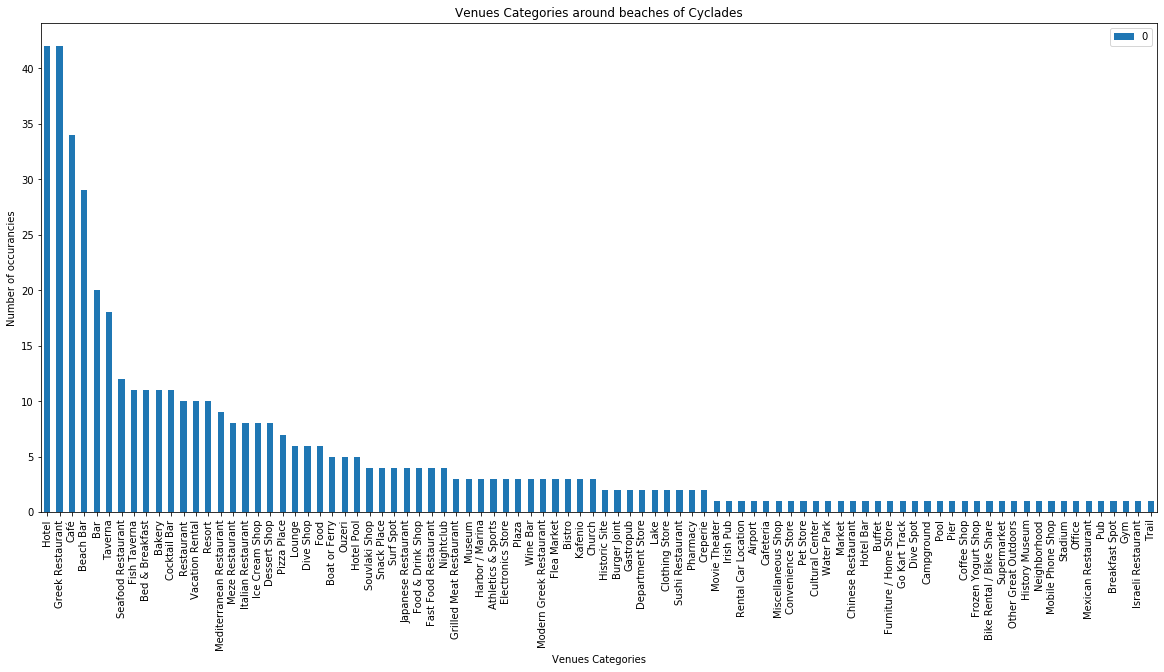

In [163]:
dvdv.plot(kind='bar', figsize=(20, 9))

plt.xlabel('Venues Categories') # add to x-label to the plot
plt.ylabel('Number of occurancies') # add y-label to the plot
plt.title('Venues Categories around beaches of Cyclades') # add title to the plot

plt.show()

We can see that Hotels and Greek restaurants are quite popular around most of the beaches. Let's continue our analysis by creating a DataFrame with the 10 most common venues categories of each beach.

In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [50]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Beach']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
beaches_venues_sorted = pd.DataFrame(columns=columns)
beaches_venues_sorted['Beach'] = Cyclades_grouped['Beach']

for ind in np.arange(Cyclades_grouped.shape[0]):
    beaches_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Cyclades_grouped.iloc[ind, :], num_top_venues)

beaches_venues_sorted.head()

,Beach,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agios Fokas Beach (Άγιος Φωκάς),Greek Restaurant,Café,Bar,Hotel,Beach Bar,Dessert Shop,Cocktail Bar,Souvlaki Shop,Coffee Shop,Bakery
1,"Agios Georgios Beach (Παραλία Αγίου Γεωργίου),...",Greek Restaurant,Café,Bar,Hotel,Bakery,Bistro,Cocktail Bar,Historic Site,Ice Cream Shop,Meze Restaurant
2,Agios Petros Beach (Παραλία Αγίου Πέτρου),Hotel,Greek Restaurant,Beach Bar,Café,Seafood Restaurant,Bakery,Boat or Ferry,Pizza Place,Souvlaki Shop,Dessert Shop
3,Agios Prokopios Beach (Παραλία Αγίου Προκοπίου),Hotel,Greek Restaurant,Café,Beach Bar,Resort,Taverna,Campground,Pizza Place,Cocktail Bar,Ice Cream Shop
4,Agkathopes Beach (Αγκαθωπές),Greek Restaurant,Café,Taverna,Kafenio,Lounge,Snack Place,Meze Restaurant,Bistro,Sushi Restaurant,Beach Bar


Before making use of k-means algorithm we need to define the optimum number of clusters for our data. We will do this by using the elbow method. 

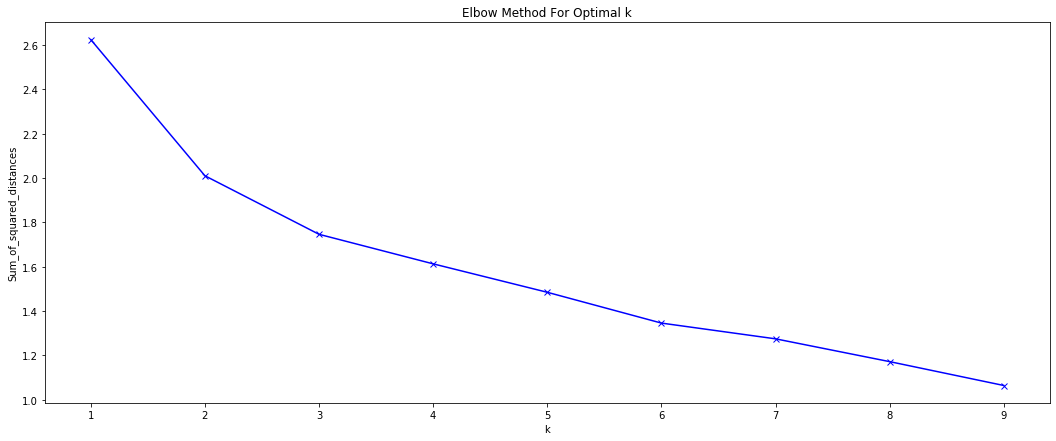

In [52]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

Cyclades_grouped_clustering = Cyclades_grouped.drop('Beach', 1)

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, random_state=0).fit(Cyclades_grouped_clustering)
    #km = KMeans(n_clusters=k)
    #km = km.fit(Cyclades_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

plt.figure(figsize=(18,7))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#distortions = []
#K = range(1,10)
#for k in K:
#    kmeanModel = KMeans(n_clusters=k).fit(Cyclades_grouped_clustering)
#    kmeanModel.fit(Cyclades_grouped_clustering)
#    distortions.append(sum(np.min(cdist(Cyclades_grouped_clustering, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / Cyclades_grouped_clustering.shape[0])

# Plot the elbow
#plt.figure(figsize=(9,5))
#plt.plot(K, distortions, 'bx-')
#plt.xlabel('k')
#plt.ylabel('Distortion')
#plt.title('The Elbow Method showing the optimal k')
#plt.show()

In the graph above we can clearly notice that the elbow is on 3 clusters. So we will proceed to fit our data to k-means using 3 clusters. 

In [53]:
# set number of clusters
kclusters = 3

Cyclades_grouped_clustering = Cyclades_grouped.drop('Beach', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Cyclades_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 2, 2, 0, 2, 0, 2, 1, 2])

In [54]:
# add clustering labels
beaches_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

#df_index_temp4=[]
#for i in df_index_temp:
#df_index_temp2=Cyclades_Beaches_Venues[Cyclades_Beaches_Venues['Beach']==i].index
    #df_index_temp4.append(Top_Cyclades_Beaches[Top_Cyclades_Beaches['Beach']==i].index)
#df_index_temp4 = [item for sublist in df_index_temp4 for item in sublist]
#Top_Cyclades_Beaches.drop(df_index_temp4, inplace=True)
#Top_Cyclades_Beaches.reset_index(drop=True, inplace=True)


Cyclades_merged = Top_Cyclades_Beaches

# merge Cyclades_grouped with Top_Cyclades_Beaches to add latitude/longitude for each beach
Cyclades_merged = Cyclades_merged.join(beaches_venues_sorted.set_index('Beach'), on='Beach')

Cyclades_merged.head() # check the last columns!

,Island,Island Latitude,Island Longitude,Beach,Beach Latitude,Beach Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Thira,36.407111,25.456664,Kamari Beach (Παραλία Καμαρίου),36.376584,25.485964,2,Hotel,Greek Restaurant,Café,Taverna,Beach Bar,Mediterranean Restaurant,Grilled Meat Restaurant,Restaurant,Movie Theater,Irish Pub
1,Thira,36.407111,25.456664,Monolithos Beach (Παραλία Μονόλιθου),36.404254,25.482393,2,Hotel,Rental Car Location,Greek Restaurant,Fish Taverna,Café,Airport,Cafeteria,Miscellaneous Shop,Convenience Store,Pet Store
2,Thira,36.407111,25.456664,Perissa Beach (Παραλία Περίσσας),36.355556,25.475620,2,Beach Bar,Greek Restaurant,Hotel,Café,Meze Restaurant,Taverna,Bed & Breakfast,Souvlaki Shop,Grilled Meat Restaurant,Italian Restaurant
3,Thira,36.407111,25.456664,Perivolos Beach (Περίβολος),36.342231,25.459853,2,Beach Bar,Hotel,Greek Restaurant,Bed & Breakfast,Restaurant,Meze Restaurant,Fish Taverna,Café,Taverna,Italian Restaurant
4,Thira,36.407111,25.456664,Vlichada Beach (Παραλία Βλυχάδας),36.338505,25.432236,2,Hotel,Fish Taverna,Beach Bar,Bed & Breakfast,Boat or Ferry,Greek Restaurant,Taverna,Lounge,Museum,Café


#### Cyclades map with clusters
Let's create the map of Cyclades with the different clusters color-coded and superimposed on top.

In [55]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [56]:
# create map
map_clusters = folium.Map(location=[37.065105, 25.192167], zoom_start=8)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Cyclades_merged['Beach Latitude'], Cyclades_merged['Beach Longitude'], Cyclades_merged['Beach'], Cyclades_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Cluster Examination
We now can have a look at the info we have on each cluster and try to identify the patterns that are common.  

But before we do that, we should add to our DataFrame the venues categories that users visit after each beach. That can further help us identify any patterns inside each cluster.

In [57]:
Cyclades_Beaches_Next.head()

,Beach,Beach Latitude,Beach Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Kamari Beach (Παραλία Καμαρίου),36.376584,25.485964,Pinakio (Πινάκιο),36.377333,25.483094,Meze Restaurant
1,Kamari Beach (Παραλία Καμαρίου),36.376584,25.485964,Sabbia Nera,36.380002,25.486956,Trattoria/Osteria
2,Kamari Beach (Παραλία Καμαρίου),36.376584,25.485964,Il Forno,36.377082,25.483737,Pizza Place
3,Kamari Beach (Παραλία Καμαρίου),36.376584,25.485964,Prince restaurant-lounge bar,36.375268,25.484685,Restaurant
4,Monolithos Beach (Παραλία Μονόλιθου),36.404254,25.482393,Mario (Μαριώ),36.403998,25.487582,Greek Restaurant


In [58]:
temp_next=pd.DataFrame(Cyclades_Beaches_Next.groupby('Beach')['Venue Category'].agg(lambda x: ','.join(x.unique())))
temp_next.reset_index(inplace=True)

In [59]:
Next_Venue=[]
for i, beach in enumerate(Cyclades_merged['Beach']):
    for b, beach2 in enumerate(temp_next['Beach']):
        if (beach==beach2):
            Next_Venue.append(temp_next['Venue Category'].iloc[b])
#df.loc[df['favorite_color'] == 'yellow']

Cyclades_merged['Next_Venue'] = Next_Venue

#### Cluster 1

In [165]:
Cyclades_merged.loc[Cyclades_merged['Cluster Labels'] == 0, Cyclades_merged.columns[[0] + [3] + list(range(7, Cyclades_merged.shape[1]))]]

,Island,Beach,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Next_Venue
9,Paros,Martselo Beach (Μαρτσέλο),Café,Greek Restaurant,Bar,Beach Bar,Burger Joint,Plaza,Wine Bar,Gastropub,Ouzeri,Modern Greek Restaurant,"Greek Restaurant,Café,Beach Bar"
12,Paros,Paroikia Beach (Παραλία Παροικιάς),Greek Restaurant,Café,Hotel,Bar,Beach Bar,Burger Joint,Plaza,Wine Bar,Gastropub,Ouzeri,"Gastropub,Ouzeri,Greek Restaurant,Dessert Shop"
13,Paros,Farangas beach,Seafood Restaurant,Restaurant,Café,Taverna,Greek Restaurant,Beach Bar,Mediterranean Restaurant,Food & Drink Shop,Food,Flea Market,"Beach Bar,Mediterranean Restaurant,Seafood Res..."
14,Paros,Lolantonis Beach,Greek Restaurant,Hotel,Café,Taverna,Seafood Restaurant,Food,Bar,Fast Food Restaurant,Food & Drink Shop,Flea Market,"Taverna,Seafood Restaurant,Café,Bar"
23,Naxos,Plaka Beach (Παραλία Πλάκας),Greek Restaurant,Café,Beach Bar,Hotel,Taverna,Bar,Ice Cream Shop,Italian Restaurant,Mediterranean Restaurant,Fish Taverna,"Greek Restaurant,Ice Cream Shop,Mexican Restau..."
25,Naxos,"Agios Georgios Beach (Παραλία Αγίου Γεωργίου),...",Greek Restaurant,Café,Bar,Hotel,Bakery,Bistro,Cocktail Bar,Historic Site,Ice Cream Shop,Meze Restaurant,"Greek Restaurant,Bistro,Café,Mediterranean Res..."
28,Tinos,Agios Fokas Beach (Άγιος Φωκάς),Greek Restaurant,Café,Bar,Hotel,Beach Bar,Dessert Shop,Cocktail Bar,Souvlaki Shop,Coffee Shop,Bakery,"Beach Bar,Greek Restaurant,Mediterranean Resta..."
29,Tinos,Pachia Ammos (Παχιά Άμμος),Greek Restaurant,Resort,Hotel Pool,Beach Bar,Food,Café,Surf Spot,Taverna,Hotel,Electronics Store,"Food,Greek Restaurant"
30,Syros,Galissas Beach (Παραλία Γαλησσά),Hotel,Café,Greek Restaurant,Bar,Vacation Rental,Harbor / Marina,Resort,Fast Food Restaurant,Electronics Store,Flea Market,"Café,Greek Restaurant"
31,Syros,Agkathopes Beach (Αγκαθωπές),Greek Restaurant,Café,Taverna,Kafenio,Lounge,Snack Place,Meze Restaurant,Bistro,Sushi Restaurant,Beach Bar,"Lounge,Restaurant,Taverna,Bistro"


In [167]:
cl1 = Cyclades_merged.loc[Cyclades_merged['Cluster Labels'] == 0, Cyclades_merged.columns[[0] + [3] + list(range(7, Cyclades_merged.shape[1]))]]
temp = cl1.loc[:, '1st Most Common Venue' : '10th Most Common Venue']
temp = temp.values.flatten()
temp111=Counter(temp)

In [173]:
cl11=pd.DataFrame(temp111, index=[0])
cl11=cl11.transpose()
cl11.sort_values(by=0, ascending=False, inplace=True)

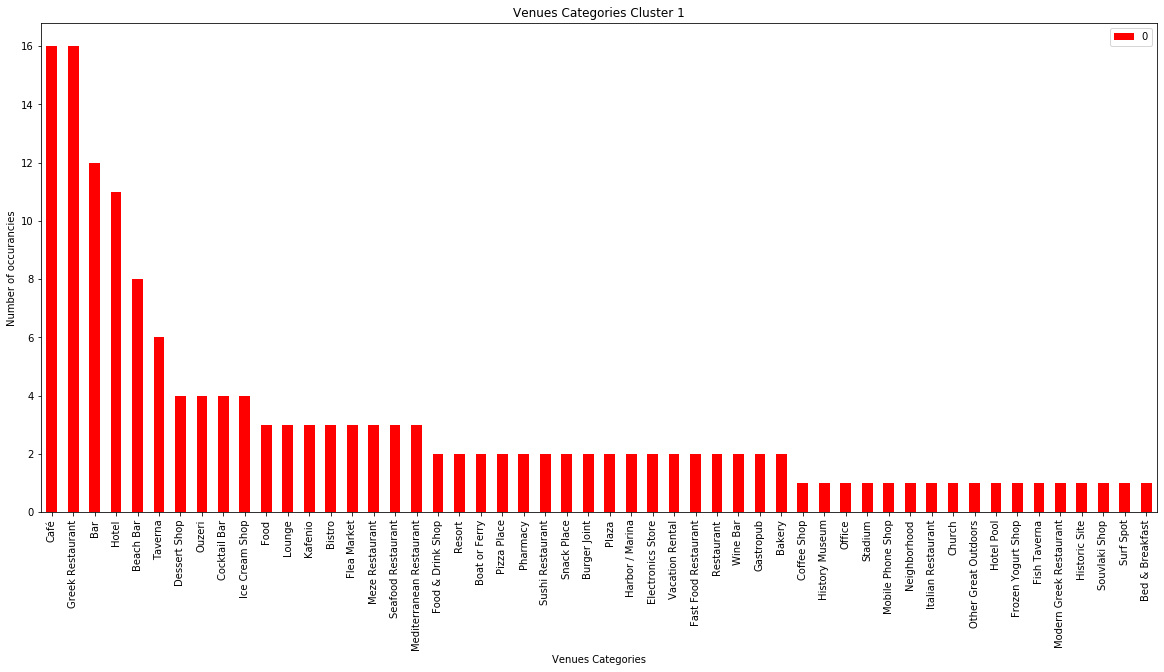

In [185]:
cl11.plot(kind='bar', figsize=(20, 9), color='red')

plt.xlabel('Venues Categories') # add to x-label to the plot
plt.ylabel('Number of occurancies') # add y-label to the plot
plt.title('Venues Categories Cluster 1') # add title to the plot

plt.show()

In the first cluster we notice amongst the most popular venues, a lot of Greek related food places, like Greek restaurants, Ouzeri, Kafenio, Meze restaurants and tavernas, as well as Cafés. Greeks are known avid coffee drinkers. A research about this cluster's beaches confirms that are preferred by Greeks. If we try to build the profile of this cluster we could state: **Traditional - Localish - Family - Populous**

The customer of this cluster is **visiting with his family, relates to modern Greek way of life and wants to meet the most popular places of a destination**.

#### Cluster 2

In [61]:
Cyclades_merged.loc[Cyclades_merged['Cluster Labels'] == 1, Cyclades_merged.columns[[0] + [3] + list(range(7, Cyclades_merged.shape[1]))]]

,Island,Beach,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Next_Venue
6,Thira,White Beach (Άσπρη Παραλία),Hotel,Taverna,Greek Restaurant,Historic Site,Dive Shop,Vacation Rental,Seafood Restaurant,Athletics & Sports,Museum,Snack Place,"Seafood Restaurant,Taverna,Café"
11,Paros,Kolympithres (Κολυμπήθρες),Hotel,Greek Restaurant,Resort,Vacation Rental,Bed & Breakfast,Seafood Restaurant,Japanese Restaurant,Café,Beach Bar,Bakery,"Athletics & Sports,Greek Restaurant,Seafood Re..."
16,Mykonos,Kalo Livadi Beach (Καλό Λιβάδι),Hotel,Taverna,Mediterranean Restaurant,Seafood Restaurant,Hotel Pool,Beach Bar,Japanese Restaurant,Café,Plaza,Fish Taverna,"Mediterranean Restaurant,Japanese Restaurant,B..."
18,Mykonos,Elia Beach (Ελιά),Hotel,Hotel Pool,Beach Bar,Vacation Rental,Athletics & Sports,Mediterranean Restaurant,Seafood Restaurant,Bed & Breakfast,Clothing Store,Japanese Restaurant,Mediterranean Restaurant
19,Mykonos,Kalafati Beach (Καλαφάτης),Hotel,Beach Bar,Mediterranean Restaurant,Vacation Rental,Greek Restaurant,Italian Restaurant,Fish Taverna,Japanese Restaurant,Modern Greek Restaurant,Dive Shop,"Greek Restaurant,Seafood Restaurant,Mediterran..."
20,Mykonos,Panormos Beach (Πάνορμος),Hotel,Beach Bar,Mediterranean Restaurant,Taverna,Greek Restaurant,Lake,Department Store,Dessert Shop,Dive Shop,Dive Spot,"Taverna,Greek Restaurant"
22,Mykonos,Lia Beach (Λιά),Hotel,Greek Restaurant,Dive Shop,Fish Taverna,Modern Greek Restaurant,Mediterranean Restaurant,Italian Restaurant,Vacation Rental,Hotel Pool,Seafood Restaurant,"Dive Shop,Greek Restaurant"
27,Tinos,Κιόνια,Hotel,Taverna,Greek Restaurant,Bar,Resort,Pool,Grilled Meat Restaurant,Cocktail Bar,Pier,Ouzeri,Taverna
37,Adamas Milos,Sarakiniko (Σαρακήνικο),Hotel,Greek Restaurant,Bike Rental / Bike Share,Bakery,Museum,Supermarket,Bed & Breakfast,Wine Bar,Food & Drink Shop,Food,"Greek Restaurant,Supermarket,Bakery"
46,Sifnos,Γλυφός,Hotel,Greek Restaurant,Church,Trail,Fish Taverna,Taverna,Seafood Restaurant,Dessert Shop,Dive Shop,Food & Drink Shop,"Seafood Restaurant,Church"


In [176]:
cl2 = Cyclades_merged.loc[Cyclades_merged['Cluster Labels'] == 1, Cyclades_merged.columns[[0] + [3] + list(range(7, Cyclades_merged.shape[1]))]]
tempcl2 = cl2.loc[:, '1st Most Common Venue' : '10th Most Common Venue']
tempcl2 = tempcl2.values.flatten()
temp222=Counter(tempcl2)

In [177]:
cl22=pd.DataFrame(temp222, index=[0])
cl22=cl22.transpose()
cl22.sort_values(by=0, ascending=False, inplace=True)

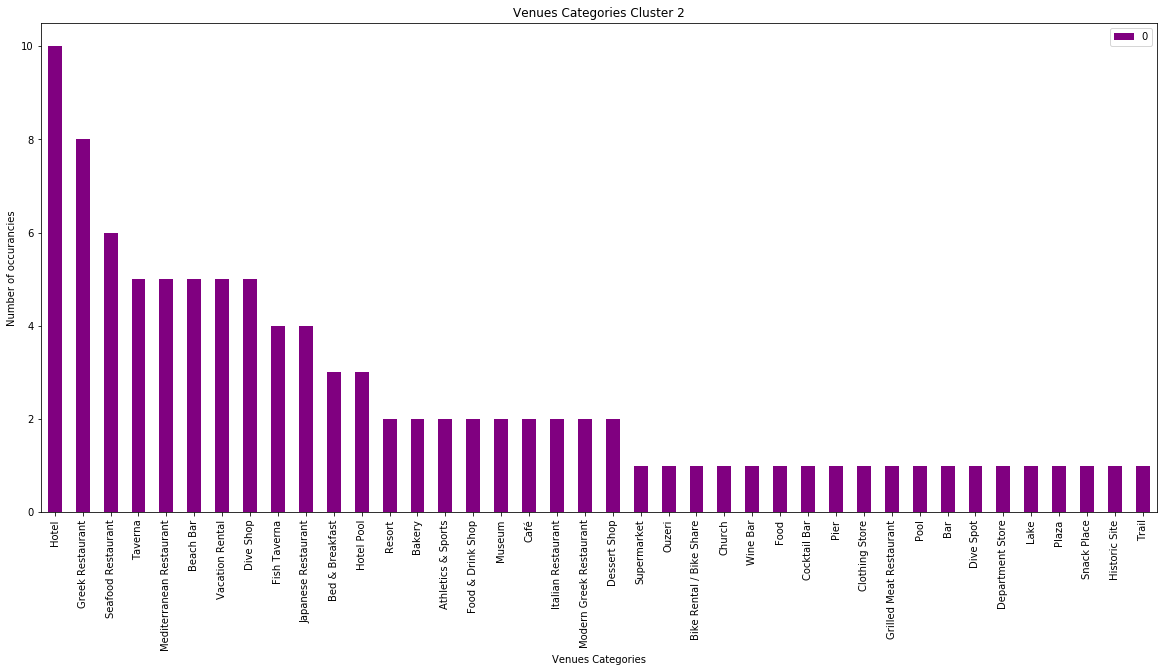

In [187]:
cl22.plot(kind='bar', figsize=(20, 9), color='purple')

plt.xlabel('Venues Categories') # add to x-label to the plot
plt.ylabel('Number of occurancies') # add y-label to the plot
plt.title('Venues Categories Cluster 2') # add title to the plot

plt.show()

In the second cluster we can immediately point out hotels as the most common venue in every single beach, plus there are a lot of hotel pools. Visitors of this cluster seem to prefer to spend time in their hotels and most of them, go for food to a nearby restaurant, after enjoying the beach. Moreover, there are a lot of Dive shops and spots as well as fish tavernas and/or seafood restaurants. Also we notice that, many of the beaches are close to scenic venues like lake, river, trail and historic site. We could characterize this cluster as: **Peaceful - Relaxing - Scenic**

All the previous observations, lead us to the conclusion that this cluster would appeal mostly to **middleaged+ customer, with good income, that appreciates nature of the calm waters of Cyclades and seek comfort**.

#### Cluster 3

In [62]:
Cyclades_merged.loc[Cyclades_merged['Cluster Labels'] == 2, Cyclades_merged.columns[[0] + [3] + list(range(7, Cyclades_merged.shape[1]))]]

,Island,Beach,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Next_Venue
0,Thira,Kamari Beach (Παραλία Καμαρίου),Hotel,Greek Restaurant,Café,Taverna,Beach Bar,Mediterranean Restaurant,Grilled Meat Restaurant,Restaurant,Movie Theater,Irish Pub,"Meze Restaurant,Trattoria/Osteria,Pizza Place,..."
1,Thira,Monolithos Beach (Παραλία Μονόλιθου),Hotel,Rental Car Location,Greek Restaurant,Fish Taverna,Café,Airport,Cafeteria,Miscellaneous Shop,Convenience Store,Pet Store,"Greek Restaurant,Fish Taverna"
2,Thira,Perissa Beach (Παραλία Περίσσας),Beach Bar,Greek Restaurant,Hotel,Café,Meze Restaurant,Taverna,Bed & Breakfast,Souvlaki Shop,Grilled Meat Restaurant,Italian Restaurant,"Fish Taverna,Beach Bar,Greek Restaurant"
3,Thira,Perivolos Beach (Περίβολος),Beach Bar,Hotel,Greek Restaurant,Bed & Breakfast,Restaurant,Meze Restaurant,Fish Taverna,Café,Taverna,Italian Restaurant,"Greek Restaurant,Beach Bar,Restaurant,Fish Tav..."
4,Thira,Vlichada Beach (Παραλία Βλυχάδας),Hotel,Fish Taverna,Beach Bar,Bed & Breakfast,Boat or Ferry,Greek Restaurant,Taverna,Lounge,Museum,Café,"Fish Taverna,Cultural Center,Beach Bar"
5,Thira,Eros (Έρως),Hotel,Fish Taverna,Boat or Ferry,Taverna,Harbor / Marina,Beach Bar,Snack Place,Café,Cultural Center,Bed & Breakfast,"Beach Bar,Fish Taverna,Cultural Center"
7,Thira,Locura Beach,Beach Bar,Hotel,Greek Restaurant,Café,Fish Taverna,Restaurant,Meze Restaurant,Bed & Breakfast,Bakery,Water Park,"Italian Restaurant,Vegetarian / Vegan Restaura..."
8,Paros,Parasporos Beach (Παραλία Παρασπόρου),Resort,Café,Hotel,Vacation Rental,Bar,Restaurant,Market,Pizza Place,Chinese Restaurant,Electronics Store,"Restaurant,Beach Bar,Chinese Restaurant,Resort"
10,Paros,Golden Beach (Χρυσή Ακτή),Hotel,Greek Restaurant,Beach Bar,Café,Italian Restaurant,Restaurant,Resort,Food,Surf Spot,Hotel Bar,"Beach Bar,Hotel Bar,Greek Restaurant"
15,Paros,Laggeri Beach (Λάγγερη),Beach Bar,Greek Restaurant,Surf Spot,Lounge,Restaurant,Seafood Restaurant,Hotel,Vacation Rental,Hotel Pool,Department Store,"Restaurant,Greek Restaurant,Beach Bar"


In [179]:
cl3 = Cyclades_merged.loc[Cyclades_merged['Cluster Labels'] == 2, Cyclades_merged.columns[[0] + [3] + list(range(7, Cyclades_merged.shape[1]))]]
tempcl3 = cl3.loc[:, '1st Most Common Venue' : '10th Most Common Venue']
tempcl3 = tempcl3.values.flatten()
temp333=Counter(tempcl3)

In [180]:
cl33=pd.DataFrame(temp333, index=[0])
cl33=cl33.transpose()
cl33.sort_values(by=0, ascending=False, inplace=True)

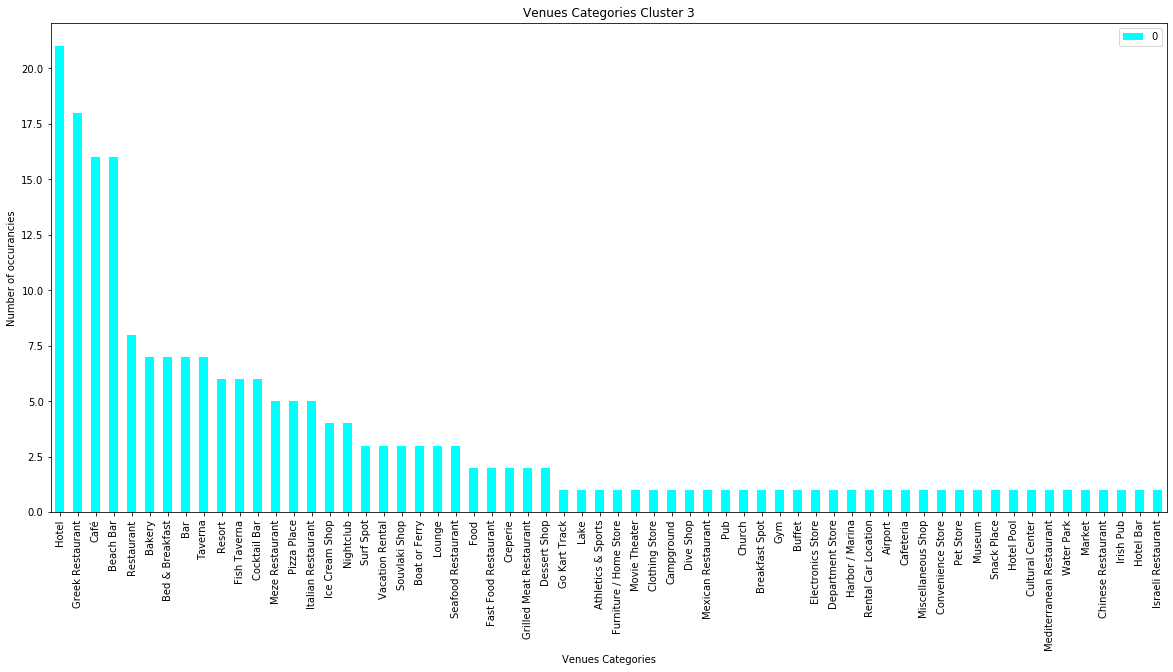

In [186]:
cl33.plot(kind='bar', figsize=(20, 9), color='cyan')

plt.xlabel('Venues Categories') # add to x-label to the plot
plt.ylabel('Number of occurancies') # add y-label to the plot
plt.title('Venues Categories Cluster 3') # add title to the plot

plt.show()

In the final cluster, bars, nightclubs, beach bars, pubs and cocktail bars stand out amongst the most popular venues as well as venues that are visited after the beach. The food related venues seem inclined to more fast and cheap choices like bakeries, Breakfast spot, pizza place, creperie, sandwich place, snack place and souvlaki spots. In addition, accommodation venues seem inclined to cheaper choices too, as, except hotels, we notice Bed & Breakfast, Vacation Rentals and Campground. Lastly, a few surf spots and a go kart track have made it to the top 10 most common venues. This cluster can be tagged as: **Romance - Active - Party**

The visitor of this cluster is **young, desires to have fun and socialize, loves nightlife and parties by the sea**.

Very interesting observations can also be made about islands. 

- **Thira** (or Santorini) and **Mykonos** appear to have both chill and wild aspects.
- **Andros**, **Naxos** and **Ios** have a Greek traditional taste but know how to party.
- **Paros** and **Sifnos** are versatile and can support all kind of tastes.
- **Kea**, **Milos**, **Syros** and **Tinos** tend to have a more quiet and family friendly character.




That concludes our analysis section

## Results and Discussion <a name="results"></a>

In this project we gathered info, utilizing Foursquare, about 45 beaches from 12 most visited Cyclades islands group. After clearing and preparing our data, we managed group them in 3 clusters with the following characteristics: 


| Clusters        | islands #  | Tags  | Customer Profile |
| ------------- |:-------------:| -----:| ---------------:|
| 1 - red |16|Traditional - Localish - Family - Populous |visiting with his family, relates to modern Greek way of life and wants to meet the most popular places of a destination |
| 2 - purple| 10 |   Peaceful - Relaxing - Scenic | middleaged+ customers, with good income, that appreciate nature of the calm waters of Cyclades and seek comfort |
| 3 - cyan | 21  |  Romance - Active - Party |young, desires to have fun and socialize, loves nightlife and parties by the sea |


Also we were able to distinguish the following geographical characteristics:


| Islands        | Clusters           | Comments  |
| ------------- |:-------------:| -----:|
| Thira (or Santorini), Mykonos | 2, 3 | both chill and wild aspects |
| Andros, Naxos, Ios | 1, 3 | Greek traditional taste, know how to party |
| Paros, Sifnos  | 1, 2, 3  | versatile |
| Kea, Milos, Syros, Tinos | 1, 2 | quiet, family friendly character | 


## Conclusion <a name="conclusion"></a>

This project covered a wide portion of Southern Aegean beaches and managed to extract useful insights that can be utilized by our stakeholders. We grouped beaches locations to clusters, based on nearby venues frequency. With this information, our stakeholders, can target customers more efficiently by matching their expecations with appropriate destinations. Moreover, project's results can be used as groundwork for anyone who wishes to invest in a beach related bussiness like beach bars, water sports and restaurants.